In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
import pytesseract

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [2]:
import os
print("Current directory:",os.getcwd())

Current directory: C:\Users\shubh\license_plate_recognition_project\notebooks


In [3]:
print("Data folder contents:",os.listdir("../data"))

Data folder contents: ['.ipynb_checkpoints', 'detection_images', 'Licplatesdetection_train.csv', 'Licplatesdetection_train.zip', 'Licplatesrecognition_train.csv', 'Licplatesrecognition_train.zip', 'recognition_images', 'SampleSubmission.csv', 'test.zip', 'test_images', 'Untitled.ipynb']


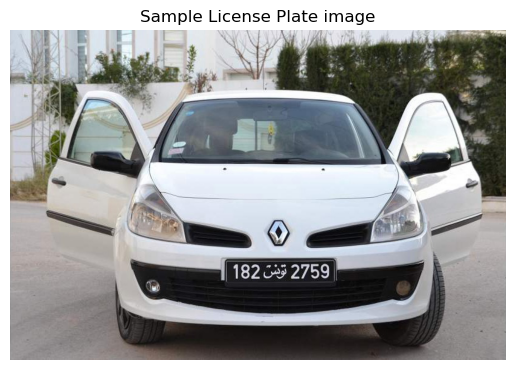

In [4]:
import cv2
import matplotlib.pyplot as plt
image_path="../data/detection_images/license_plates_detection_train/11.jpg"
image=cv2.imread(image_path)
if image is None:
    print("Image not found.Double-check the path!")
else:
 image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Sample License Plate image")
plt.axis("off")
plt.show()

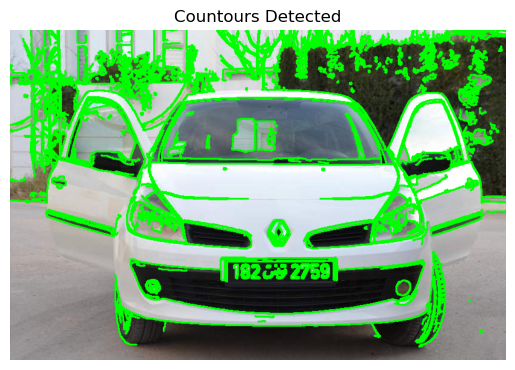

In [5]:
import cv2
import matplotlib.pyplot as plt
image_path="../data/detection_images/license_plates_detection_train/11.jpg"
image=cv2.imread(image_path)
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges=cv2.Canny(gray,100,200)
contours,_=cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = image.copy()
cv2.drawContours(image_with_contours,contours,-1,(0,255,0),2)
image_rgb=cv2.cvtColor(image_with_contours,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Countours Detected")
plt.axis("off")
plt.show()

In [6]:
print(type(contours[0]))

<class 'numpy.ndarray'>


In [7]:
for contour in contours:
    epsilon=0.02*cv2.arcLength(contour,True)
    approx=cv2.approxPolyDP(contour,epsilon,True)
    x,y,w,h =cv2.boundingRect(approx)
    ratio=w/h
    print(f"x={x},y={y},w={w},h={h},ratio={w/h:2f}")
    if w>100 and h>25 and 3.0<ratio<5.5:
     plate_img=image[y:y+h,x:x+w]
     break

x=778,y=498,w=5,h=3,ratio=1.666667
x=778,y=498,w=5,h=3,ratio=1.666667
x=701,y=485,w=10,h=16,ratio=0.625000
x=682,y=485,w=7,h=13,ratio=0.538462
x=254,y=484,w=4,h=16,ratio=0.250000
x=410,y=482,w=13,h=2,ratio=6.500000
x=190,y=482,w=4,h=10,ratio=0.400000
x=702,y=478,w=5,h=10,ratio=0.500000
x=682,y=475,w=8,h=14,ratio=0.571429
x=405,y=474,w=32,h=2,ratio=16.000000
x=198,y=470,w=17,h=8,ratio=2.125000
x=691,y=465,w=3,h=6,ratio=0.500000
x=190,y=465,w=5,h=15,ratio=0.333333
x=180,y=454,w=1,h=19,ratio=0.052632
x=673,y=453,w=25,h=66,ratio=0.378788
x=689,y=452,w=3,h=8,ratio=0.375000
x=640,y=451,w=3,h=2,ratio=1.500000
x=760,y=447,w=2,h=4,ratio=0.500000
x=177,y=445,w=2,h=23,ratio=0.086957
x=636,y=430,w=39,h=27,ratio=1.444444
x=174,y=418,w=36,h=104,ratio=0.346154
x=676,y=408,w=27,h=111,ratio=0.243243
x=692,y=481,w=8,h=19,ratio=0.421053
x=705,y=387,w=3,h=1,ratio=3.000000
x=705,y=385,w=3,h=1,ratio=3.000000
x=702,y=381,w=4,h=1,ratio=4.000000
x=199,y=377,w=487,h=94,ratio=5.180851


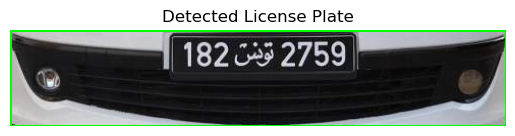

In [8]:
cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(plate_img,cv2.COLOR_BGR2RGB))
plt.title("Detected License Plate")
plt.axis("off")
plt.show()

In [9]:
!pip install pytesseract

In [10]:
import pytesseract

In [11]:
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [12]:
import os
os.environ["TESSDATA_PREFIX"]=r"C:\Program Files\Tesseract-OCR\tessdata"

In [13]:
# ---- preprocess the cropped plate ----
plate_gray=cv2.cvtColor(plate_img,cv2.COLOR_BGR2GRAY)
plate_gray=cv2.bilateralFilter(plate_gray,11,17,17)
clahe=cv2.createCLAHE(clipLimit=3.0,tileGridSize=(8,8))
plate_gray=clahe.apply(plate_gray)
_,plate_bw=cv2.threshold(plate_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imwrite("plate_bw_debug.png",plate_bw)
text=pytesseract.image_to_string(plate_bw,lang="eng+ara",config="__psm7")
print("Detected text:",text.strip())

Detected text: 182 c45 2759


In [14]:
from pytesseract import pytesseract
import os
print("Tesseract path:",pytesseract.tesseract_cmd)
print("Tesseract prifix:",os.environ.get("TESSDATA_PREFIX"))

Tesseract path: C:\Program Files\Tesseract-OCR\tesseract.exe
Tesseract prifix: C:\Program Files\Tesseract-OCR\tessdata


In [15]:
with open ("recognized_plates.txt","a",encoding="utf-8")as file:
    file.write(text.strip()+"\n")

In [16]:
text=pytesseract.image_to_string(plate_bw,lang="eng+ara",config="__psm7")
print("Detected text:",text.strip())
with open ("recognized_plates.txt","a",encoding="utf-8")as file:
    file.write(text.strip()+"\n")

Detected text: 182 c45 2759


In [17]:
import os
print("Current folder:",os.getcwd())
print("Current of../data:")
print(os.listdir("../data"))

Current folder: C:\Users\shubh\license_plate_recognition_project\notebooks
Current of../data:
['.ipynb_checkpoints', 'detection_images', 'Licplatesdetection_train.csv', 'Licplatesdetection_train.zip', 'Licplatesrecognition_train.csv', 'Licplatesrecognition_train.zip', 'recognition_images', 'SampleSubmission.csv', 'test.zip', 'test_images', 'Untitled.ipynb']


In [18]:
import os 
print(os.listdir("../data/test_images"))

['test']


In [19]:
import os

In [20]:
from pathlib import Path
import pytesseract
import cv2
import pandas as pd
import re

# Set Tesseract path (update if needed)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Path to test images
test_dir = Path("../data/test_images/test/test")
import os 
print("Files inside test_images/test:",os.listdir(str(test_dir)))

# Initialize list to collect results
results = []

# Loop through sorted test images (JPG & PNG)
for image_path in sorted(test_dir.glob("*.jpg")) + sorted(test_dir.glob("*.png")):
    try:
        image = cv2.imread(str(image_path))
        image_id = image_path.stem

        # Basic preprocessing
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = cv2.bilateralFilter(gray, 11, 17, 17)
        _, plate_bw = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # OCR
        text = pytesseract.image_to_string(plate_bw, lang="eng+ara", config="--psm 7")

        # Clean text
        text = re.sub(r'[^\w\s\u0600-\u06FF]', '', text)

        # Append result
        results.append({"image_id": image_id, "label": text})
        
    except Exception as e:
        print(f"Error processing {image_path.name}: {e}")




Files inside test_images/test: ['1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg', '1005.jpg', '1006.jpg', '1007.jpg', '1008.jpg', '1009.jpg', '1010.jpg', '1011.jpg', '1012.jpg', '1013.jpg', '1014.jpg', '1015.jpg', '1016.jpg', '1017.jpg', '1018.jpg', '1019.jpg', '1020.jpg', '1021.jpg', '1022.jpg', '1023.jpg', '1024.jpg', '1025.jpg', '1026.jpg', '1027.jpg', '1028.jpg', '1029.jpg', '1030.jpg', '1031.jpg', '1032.jpg', '1033.jpg', '1034.jpg', '1035.jpg', '1036.jpg', '1037.jpg', '1038.jpg', '1039.jpg', '1040.jpg', '1041.jpg', '1042.jpg', '1043.jpg', '1044.jpg', '1045.jpg', '1046.jpg', '1047.jpg', '1048.jpg', '1049.jpg', '1050.jpg', '1051.jpg', '1052.jpg', '1053.jpg', '1054.jpg', '1055.jpg', '1056.jpg', '1057.jpg', '1058.jpg', '1059.jpg', '1060.jpg', '1061.jpg', '1062.jpg', '1063.jpg', '1064.jpg', '1065.jpg', '1066.jpg', '1067.jpg', '1068.jpg', '1069.jpg', '1070.jpg', '1071.jpg', '1072.jpg', '1073.jpg', '1074.jpg', '1075.jpg', '1076.jpg', '1077.jpg', '1078.jpg', '1079.jpg', '1080.jp

In [21]:
submission_df = pd.DataFrame(results)
submission_df.to_csv("final_submission.csv", index=False)
print("CSV saved as final_submission.csv")

CSV saved as final_submission.csv


In [22]:
import pandas as pd 
df=pd.read_csv("final_submission.csv")
print(df.head())
print("Total predictions:",len(df))

   image_id     label
0      1000  Ee  1 \n
1      1001       NaN
2      1002        \n
3      1003       NaN
4      1004       NaN
Total predictions: 210


In [23]:
text = re.sub(r'[^\w\s\u0600-\u06FF]', '', text)

In [24]:
import os
import shutil
output_dir="../output"
os.makedirs(output_dir,exist_ok=True)
shutil.move("final_submission.csv",
            os.path.join(output_dir,"final_submission.csv"))
print("Moved final_submission.csv to output folder.")

Moved final_submission.csv to output folder.


In [29]:
import os
print(os.getcwd())

C:\Users\shubh\license_plate_recognition_project\notebooks


In [30]:
print(os.listdir("../output"))
df=pd.read_csv("../output/final_submission.csv")

['final_submission.csv']


In [33]:
print(df.head())
print("Total predictinos:",len(df))

   image_id     label
0      1000  Ee  1 \n
1      1001       NaN
2      1002        \n
3      1003       NaN
4      1004       NaN
Total predictinos: 210
